In [ ]:
import math
import os
import tempfile
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import os
import shutil

os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

os.chmod("/root/.kaggle/kaggle.json", 600)  # Atur izin file


In [ ]:
!pip install kaggle

In [ ]:
!kaggle competitions download -c data-analytics-competition-find-it-2025

In [ ]:
import zipfile
with zipfile.ZipFile("/content/data-analytics-competition-find-it-2025.zip", "r") as zip_ref:
    zip_ref.extractall("data")

In [ ]:
df = pd.read_csv("/content/data/dataset/train.csv")

In [ ]:
test = pd.read_csv("/content/data/dataset/test.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   developerCountry                 7000 non-null   object 
 1   countryCode                      6936 non-null   object 
 2   userRatingCount                  7000 non-null   int64  
 3   primaryGenreName                 7000 non-null   object 
 4   downloads                        4851 non-null   object 
 5   deviceType                       7000 non-null   object 
 6   hasPrivacyLink                   6250 non-null   object 
 7   hasTermsOfServiceLink            2365 non-null   object 
 8   hasTermsOfServiceLinkRating      2365 non-null   object 
 9   isCorporateEmailScore            5872 non-null   float64
 10  adSpent                          1321 non-null   float64
 11  appAge                           6950 non-null   float64
 12  averageUserRating   

In [ ]:
df.head(10)

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
0,NORWAY,RO,127731,Sports,NaN,smartphone,True,True,low,99.0,14.017220,160.400000,4.0,medium,low,low
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,NaN,NaN,99.0,NaN,17.500000,0.0,NaN,low,low
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,True,low,0.0,31.883163,30.766667,4.0,NaN,low,low
3,GERMANY,GLOBAL,1074,Games,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,71.533333,4.0,NaN,low,low
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,NaN,NaN,99.0,NaN,52.400000,4.0,NaN,low,low
5,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Tools,50 - 100,GLOBAL,True,NaN,NaN,0.0,NaN,37.700000,NaN,NaN,low,low
6,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,237,Games,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,88.266667,0.0,medium,low,low
7,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Personalization,1 - 5,GLOBAL,True,NaN,NaN,99.0,NaN,24.233333,NaN,NaN,low,low
8,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Business,50 - 100,GLOBAL,NaN,NaN,NaN,99.0,NaN,76.266667,0.0,NaN,low,low
9,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Entertainment,100 - 500,GLOBAL,True,NaN,NaN,0.0,NaN,71.433333,0.0,NaN,low,low


In [ ]:
df['downloads'].unique()

array([nan, '50 - 100', '50000000 - 100000000', '1000 - 5000', '1 - 5',
       '100 - 500', '10000 - 50000', '50000 - 100000', '10 - 50',
       '5 - 10', '100000 - 500000', '5000 - 10000', '500 - 1000',
       '1000000 - 5000000', '0 - 1', '10000000 - 50000000',
       '500000 - 1000000', '5000000 - 10000000', '100000000 - 500000000',
       '10000000000 - 15000000000', '500000000 - 1000000000',
       '1000000000 - 5000000000'], dtype=object)

In [ ]:
download_corrections = {
    '1 - 1': '0 - 1',
    '5 - 1': '5 - 10',
    '10 - 1': '10 - 50',
    '50 - 1': '50 - 100',
    '500 - 1': '500 - 1000'
}

df['downloads'] = df['downloads'].replace(download_corrections)

In [ ]:
test['downloads'] = test['downloads'].replace(download_corrections)

In [ ]:
amount = df['primaryGenreName'].value_counts()

In [ ]:
# Mengganti nilai kosong (NaN) di kolom 'downloads' dengan 'Unknown'
df['downloads'] = df['downloads'].fillna('Unknown')

# Membuat pivot table
pvt = pd.crosstab(df['primaryGenreName'], df['downloads'])
unknown = pvt['Unknown']


In [ ]:
comparation = pd.merge(amount, unknown, left_index=True, right_index=True)

In [ ]:
comparation

,count,Unknown
primaryGenreName,,
Games,1828,497
Education,500,163
Entertainment,431,107
Business,423,196
Lifestyle,340,163
Tools,308,0
Music & Audio,280,0
Food & Drink,279,112
Shopping,268,87


In [ ]:
df[df['primaryGenreName']== 'Games']['downloads'].value_counts()

,count
downloads,
1000000 - 5000000,172
10000 - 50000,166
1000 - 5000,160
100000 - 500000,158
10 - 50,136
10000000 - 50000000,132
100 - 500,120
unknown,104
5000000 - 10000000,81


In [ ]:
def map_download_range(rating_count):
    if rating_count == 0:
        return 'unknown'
    elif rating_count == 1:
        return '0 - 1'
    elif rating_count <= 5:
        return '1 - 5'
    elif rating_count <= 10:
        return '5 - 10'
    elif rating_count <= 50:
        return '10 - 50'
    elif rating_count <= 100:
        return '50 - 100'
    elif rating_count <= 500:
        return '100 - 500'
    elif rating_count <= 1000:
        return '500 - 1000'
    elif rating_count <= 5000:
        return '1000 - 5000'
    elif rating_count <= 10000:
        return '5000 - 10000'
    elif rating_count <= 50000:
        return '10000 - 50000'
    elif rating_count <= 100000:
        return '50000 - 100000'
    elif rating_count <= 500000:
        return '100000 - 500000'
    elif rating_count <= 1000000:
        return '500000 - 1000000'
    elif rating_count <= 5000000:
        return '1000000 - 5000000'
    elif rating_count <= 10000000:
        return '5000000 - 10000000'
    elif rating_count <= 50000000:
        return '10000000 - 50000000'
    elif rating_count <= 100000000:
        return '50000000 - 100000000'
    elif rating_count <= 500000000:
        return '100000000 - 500000000'
    elif rating_count <= 1000000000:
        return '500000000 - 1000000000'
    elif rating_count <= 5000000000:
        return '1000000000 - 5000000000'
    else:
        return '10000000000 - 15000000000'

# Isi nilai missing di kolom downloads
df['downloads'] = df.apply(
    lambda row: map_download_range(row['userRatingCount']) if pd.isna(row['downloads']) else row['downloads'],
    axis=1
)


In [ ]:
test['downloads'] = test.apply(
    lambda row: map_download_range(row['userRatingCount']) if pd.isna(row['downloads']) else row['downloads'],
    axis=1
)

In [ ]:
df['downloads'].value_counts()

,count
downloads,
Unknown,2149
100 - 500,699
10 - 50,682
1000 - 5000,591
10000 - 50000,396
500 - 1000,325
50 - 100,311
100000 - 500000,270
1000000 - 5000000,248


In [ ]:
df.isnull().sum()

,0
developerCountry,0
countryCode,64
userRatingCount,0
primaryGenreName,0
downloads,0
deviceType,0
hasPrivacyLink,750
hasTermsOfServiceLink,4635
hasTermsOfServiceLinkRating,4635
isCorporateEmailScore,1128


In [ ]:
df.loc[df['appAge'].isnull()]

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
364,CHINA,VN,5161,Games,500000 - 1000000,smartphone,True,False,high,99.0,14.916983,NaN,4.0,NaN,low,low
734,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Travel & Local,100 - 500,GLOBAL,False,False,high,0.0,NaN,NaN,5.0,NaN,low,low
779,CYPRUS,GLOBAL,51897,Games,5000000 - 10000000,tablet,True,True,low,99.0,51.511667,NaN,4.0,NaN,medium,low
807,UNITED KINGDOM,GLOBAL,0,Business,1 - 5,GLOBAL,True,False,high,99.0,NaN,NaN,0.0,NaN,low,low
836,ICELAND,GLOBAL,16,Games,1000 - 5000,GLOBAL,True,NaN,NaN,0.0,NaN,NaN,3.0,NaN,high,low
1463,THAILAND,GLOBAL,21,Travel & Local,100 - 500,GLOBAL,True,NaN,NaN,0.0,NaN,NaN,4.0,NaN,low,low
1517,CANNOT IDENTIFY COUNTRY,GLOBAL,252,Music & Audio,10000 - 50000,GLOBAL,True,True,low,99.0,NaN,NaN,4.0,medium,low,low
1581,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,169,Video Players & Editors,10000 - 50000,GLOBAL,True,False,high,0.0,NaN,NaN,4.0,NaN,low,low
1844,JAPAN,GLOBAL,93,Personalization,10000 - 50000,GLOBAL,True,True,low,99.0,NaN,NaN,3.0,NaN,low,low
1865,NETHERLANDS,GLOBAL,8,Health & Fitness,1000 - 5000,GLOBAL,True,NaN,NaN,0.0,NaN,NaN,2.0,NaN,low,low


In [ ]:
target = pd.read_csv("/content/data/dataset/target.csv")

In [ ]:
target.head()

,coppaRisk
0,False
1,False
2,False
3,False
4,False


In [ ]:
df['coppaRisk'] = target['coppaRisk']

In [ ]:
df.head()

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,appAge,averageUserRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk,developerCountry_freq,countryCode_freq,primaryGenreName_freq
0,NORWAY,RO,127731,Sports,Unknown,smartphone,True,low,99.0,160.400000,4.0,low,low,False,3.0,7.0,54.0
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,undetermine,99.0,17.500000,0.0,low,low,False,4338.0,5802.0,71.0
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,low,0.0,30.766667,4.0,low,low,False,39.0,5.0,1828.0
3,GERMANY,GLOBAL,1074,Games,Unknown,GLOBAL,True,undetermine,99.0,71.533333,4.0,low,low,False,35.0,5802.0,1828.0
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,undetermine,99.0,52.400000,4.0,low,low,False,769.0,5802.0,308.0


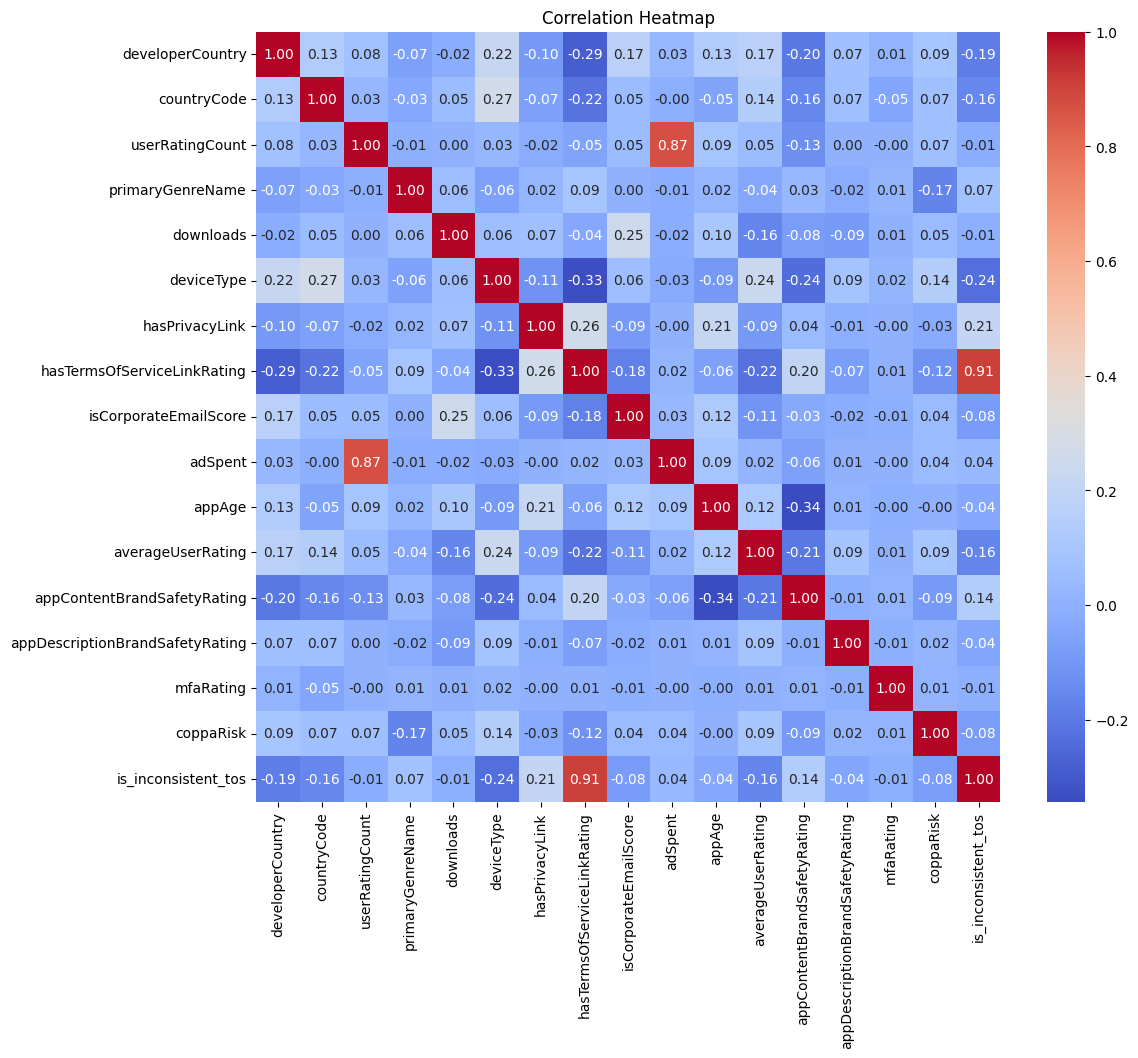

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
le = LabelEncoder()

# Encode semua kolom kategorikal (biar bisa dihitung korelasinya)
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        df_copy[col] = le.fit_transform(df_copy[col].astype(str))

# Hitung korelasi dengan target coppaRisk
correlation = df_copy.corr(numeric_only=True)['coppaRisk'].sort_values(ascending=False)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df_copy.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Drop kolom numerik
kolom_numerik = ['userRatingCount', 'adSpent', 'appAge', 'averageUserRating']
df_nominal = df.drop(columns=kolom_numerik)

# Isi missing value dengan 'unknown'
df_nominal = df_nominal.fillna('unknown')

# Hitung Cramér's V untuk setiap kolom nominal terhadap coppaRisk
cramers_scores = {}
for col in df_nominal.columns:
    if col != 'coppaRisk':
        cramers_scores[col] = cramers_v(df_nominal[col], df_nominal['coppaRisk'])

# Tampilkan hasil
cramers_df = pd.DataFrame.from_dict(cramers_scores, orient='index', columns=['Cramers_V']).sort_values(by='Cramers_V', ascending=False)
print(cramers_df)


                                 Cramers_V
primaryGenreName                  0.411813
countryCode                       0.204791
downloads                         0.187484
developerCountry                  0.162830
deviceType                        0.148012
hasTermsOfServiceLink             0.137328
hasTermsOfServiceLinkRating       0.137328
appDescriptionBrandSafetyRating   0.095489
appContentBrandSafetyRating       0.089854
isCorporateEmailScore             0.036795
hasPrivacyLink                    0.033263
mfaRating                         0.000000


In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Salin data
df_mi = df.copy()

# Ganti semua NaN dengan 'unknown'
df_mi = df_mi.fillna('unknown')

# Ambil kolom kategorikal
categorical_cols = df_mi.select_dtypes(include=['object', 'bool']).columns.tolist()

# Hapus target kalau ada
if 'coppaRisk' in categorical_cols:
    categorical_cols.remove('coppaRisk')

# Ubah semua kolom kategorikal ke string (biar seragam untuk LabelEncoder)
df_mi[categorical_cols] = df_mi[categorical_cols].astype(str)
df_mi['coppaRisk'] = df_mi['coppaRisk'].astype(str)

# Label Encoding
le = LabelEncoder()
for col in categorical_cols + ['coppaRisk']:
    df_mi[col] = le.fit_transform(df_mi[col])

# Hitung Mutual Information
X = df_mi[categorical_cols]
y = df_mi['coppaRisk']
mi_scores = mutual_info_classif(X, y, discrete_features=True)

# Simpan hasil ke DataFrame
mi_df = pd.DataFrame({'Feature': categorical_cols, 'Mutual_Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)
print(mi_df)


                            Feature  Mutual_Information
10                           appAge            0.182421
9                           adSpent            0.109484
2                  primaryGenreName            0.094547
1                       countryCode            0.020348
0                  developerCountry            0.016642
3                         downloads            0.015219
11                averageUserRating            0.011226
4                        deviceType            0.009056
6             hasTermsOfServiceLink            0.008975
7       hasTermsOfServiceLinkRating            0.008975
13  appDescriptionBrandSafetyRating            0.006024
12      appContentBrandSafetyRating            0.003628
8             isCorporateEmailScore            0.000808
5                    hasPrivacyLink            0.000770
14                        mfaRating            0.000121


In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# 1. Pilih kolom bertipe object
cat_cols = df.select_dtypes(include='object').columns

# 2. Filter kolom yang isinya hanya string (tanpa list, dict, NoneType, dll)
valid_cats = []
for col in cat_cols:
    unique_types = df[col].dropna().apply(type).unique()
    if len(unique_types) == 1 and unique_types[0] == str:
        valid_cats.append(col)

# 3. Kalau tidak ada kolom valid, kasih peringatan
if not valid_cats:
    raise ValueError("Tidak ada kolom kategorikal bertipe string yang valid untuk dianalisis.")

# 4. Ambil subset dataframe
X = df[valid_cats].fillna("unknown")
y = df['coppaRisk']  # ganti dengan nama kolom target kamu

# 5. Konversi ke kategori
X_cat = X.astype('category')

# 6. Encoding pakai .cat.codes
X_encoded = X_cat.apply(lambda col: col.cat.codes)

# 7. Hitung mutual information
mi_scores = mutual_info_classif(X_encoded, y, discrete_features=True, random_state=42)

# 8. Simpan dalam dataframe
mi_df = pd.DataFrame({'Feature': valid_cats, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

print(mi_df)


                           Feature  MI Score
2                 primaryGenreName  0.094547
1                      countryCode  0.020348
0                 developerCountry  0.016642
3                        downloads  0.014604
4                       deviceType  0.009056
5      hasTermsOfServiceLinkRating  0.008975
7  appDescriptionBrandSafetyRating  0.006024
6      appContentBrandSafetyRating  0.003628
8                        mfaRating  0.000121


In [ ]:
mi_df

,Feature,Mutual_Information
249,primaryGenreName_Games,3.134851e-02
244,primaryGenreName_Education,2.188601e-02
154,countryCode_GLOBAL,1.199638e-02
302,deviceType_GLOBAL,8.772250e-03
315,hasTermsOfServiceLinkRating_unknown,8.768400e-03
...,...,...
306,deviceType_undetermined,6.548112e-07
10,developerCountry_BANGLADESH,5.086446e-07
150,countryCode_FI,2.604053e-09
223,countryCode_UA,2.604053e-09


In [ ]:
df.duplicated().sum()

np.int64(3)

In [ ]:
df_cleaned = df.drop_duplicates(keep='first')

In [ ]:
# Menampilkan baris yang terduplikasi
duplicated_rows = df[df.duplicated()]
duplicated_rows

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk
2151,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Books & Reference,1 - 5,GLOBAL,True,NaN,NaN,0.0,NaN,12.866667,NaN,NaN,low,low,False
2405,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Utilities,Unknown,GLOBAL,True,NaN,NaN,NaN,NaN,8.866667,0.0,NaN,high,low,False
4735,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Education,Unknown,GLOBAL,True,NaN,NaN,NaN,NaN,98.400000,0.0,NaN,low,low,False


In [ ]:
# Compare row 2151 and 2405
df.iloc[2151] == df.iloc[2405]


,0
developerCountry,True
countryCode,True
userRatingCount,True
primaryGenreName,False
downloads,False
deviceType,True
hasPrivacyLink,True
hasTermsOfServiceLink,False
hasTermsOfServiceLinkRating,False
isCorporateEmailScore,False


Aneh, padahal datanya ga duplikat tapi dibilang gtu

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_cleaned is the cleaned DataFrame without duplicates
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Heatmap of Correlation Matrix")
plt.show()


In [ ]:
pd.DataFrame(df['developerCountry'].unique(), columns=['developerCountry'])

,developerCountry
0,NORWAY
1,ADDRESS NOT LISTED IN PLAYSTORE
2,UNITED ARAB EMIRATES
3,GERMANY
4,CANNOT IDENTIFY COUNTRY
...,...
109,BELARUS
110,NEPAL
111,LEBANON
112,MALDIVES


In [ ]:
df['developerCountry'].unique()

array(['NORWAY', 'ADDRESS NOT LISTED IN PLAYSTORE',
       'UNITED ARAB EMIRATES', 'GERMANY', 'CANNOT IDENTIFY COUNTRY',
       'FINLAND', 'SINGAPORE', 'UNITED STATES', 'REPUBLIC OF KOREA',
       'MONGOLIA', 'PAKISTAN', 'VIET NAM', 'OMAN', 'FRANCE', 'INDIA',
       'CHINA', 'NETHERLANDS', 'RUSSIAN FEDERATION', 'INDONESIA', 'ITALY',
       'UZBEKISTAN', 'UNITED KINGDOM', 'CANADA', 'NEW ZEALAND',
       'SRI LANKA', 'AUSTRALIA', "COTE D'IVOIRE", 'IRELAND', 'KAZAKHSTAN',
       'HONG KONG', 'CHILE', 'BAHRAIN', 'JAPAN', 'SWITZERLAND', 'ISRAEL',
       'SPAIN', 'TURKEY', 'ESTONIA', 'SWEDEN', 'DOMINICAN REPUBLIC',
       'AUSTRIA', 'MALAYSIA', 'POLAND', 'CYPRUS', 'UKRAINE',
       'ISLE OF MAN', 'ARGENTINA', 'BANGLADESH', 'ICELAND', 'JORDAN',
       'MOROCCO', 'PERU', 'NIGER', 'BULGARIA', 'ROMANIA', 'SLOVENIA',
       'SOUTH AFRICA', 'KENYA', 'NIGERIA', 'ALBANIA', 'CZECH REPUBLIC',
       'SAUDI ARABIA', 'PANAMA', 'ANDORRA', 'THAILAND', 'MALTA',
       'VENEZUELA', 'GREECE', 'YEMEN', 'EGYPT

In [ ]:
df['developerCountry'].value_counts()

,count
developerCountry,
ADDRESS NOT LISTED IN PLAYSTORE,4338
CANNOT IDENTIFY COUNTRY,769
UNITED STATES,324
CHINA,150
INDIA,131
...,...
KYRGYZSTAN,1
BELARUS,1
LEBANON,1


In [ ]:
test = pd.read_csv("/content/data/dataset/test.csv")

In [ ]:
test.shape

(3000, 17)

In [ ]:
test['developerCountry'].value_counts()

,count
developerCountry,
ADDRESS NOT LISTED IN PLAYSTORE,1821
CANNOT IDENTIFY COUNTRY,331
UNITED STATES,179
CHINA,71
INDIA,55
...,...
ARMENIA,1
SLOVENIA,1
NORWAY,1


In [ ]:
target = pd.read_csv("/content/data/dataset/target.csv")

In [ ]:
target.head()

,coppaRisk
0,False
1,False
2,False
3,False
4,False


In [ ]:
df.head()

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk
0,NORWAY,RO,127731,Sports,Unknown,smartphone,True,True,low,99.0,14.017220,160.400000,4.0,medium,low,low,False
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,NaN,NaN,99.0,NaN,17.500000,0.0,NaN,low,low,False
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,True,low,0.0,31.883163,30.766667,4.0,NaN,low,low,False
3,GERMANY,GLOBAL,1074,Games,Unknown,GLOBAL,True,NaN,NaN,99.0,NaN,71.533333,4.0,NaN,low,low,False
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,NaN,NaN,99.0,NaN,52.400000,4.0,NaN,low,low,False


In [ ]:
# # Logic for consistency
# df['is_inconsistent_tos'] = (
#     # Case 1: Both null
#     (df['hasTermsOfServiceLink'].isnull() & df['hasTermsOfServiceLinkRating'].isnull()) |
#     # Case 2: Link is True AND rating is not null
#     ((df['hasTermsOfServiceLink'] == True) & df['hasTermsOfServiceLinkRating'].notnull()) |
#     # Case 3: Link is False AND rating is null
#     ((df['hasTermsOfServiceLink'] == False) & df['hasTermsOfServiceLinkRating'].isnull()))

In [ ]:
df.drop(columns=['hasTermsOfServiceLink'], inplace=True)

In [ ]:
test.drop(columns=['hasTermsOfServiceLink'], inplace=True)

In [ ]:
df['averageUserRating'] = df['averageUserRating'].fillna(0)

In [ ]:
test['averageUserRating'] = test['averageUserRating'].fillna(0)

In [ ]:
df.head()

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk
0,NORWAY,RO,127731,Sports,Unknown,smartphone,True,low,99.0,14.017220,160.400000,4.0,low,low,False
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,NaN,99.0,NaN,17.500000,0.0,low,low,False
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,low,0.0,31.883163,30.766667,4.0,low,low,False
3,GERMANY,GLOBAL,1074,Games,Unknown,GLOBAL,True,NaN,99.0,NaN,71.533333,4.0,low,low,False
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,NaN,99.0,NaN,52.400000,4.0,low,low,False


In [ ]:
df.drop(columns=['appContentBrandSafetyRating', 'adSpent'], inplace=True)

In [ ]:
test.drop(columns=['appContentBrandSafetyRating', 'adSpent'], inplace=True)

In [ ]:
columns_to_fill = ['countryCode', 'hasPrivacyLink', 'hasTermsOfServiceLinkRating', 'isCorporateEmailScore']
df[columns_to_fill] = df[columns_to_fill].fillna('undetermine')

In [ ]:
columns_to_fill = ['countryCode', 'hasPrivacyLink', 'hasTermsOfServiceLinkRating', 'isCorporateEmailScore']
test[columns_to_fill] = test[columns_to_fill].fillna('undetermine')

In [ ]:
def frequency_encode_safe(train_df, test_df, cols):
    # Build frequency map from train only
    freq_map = train_df[cols].apply(lambda x: x.value_counts())

    # Apply to train and test
    train_df = train_df.assign(**{col + '_freq': train_df[col].map(freq_map[col]) for col in cols})
    test_df = test_df.assign(**{col + '_freq': test_df[col].map(freq_map[col]) for col in cols})

    # Fill unseen categories with -1
    train_df.update(train_df[cols].fillna(-1))
    test_df.update(test_df[cols].fillna(-1))

    return train_df, test_df


In [ ]:
cols_to_encode = ['developerCountry', 'countryCode', 'primaryGenreName']
train_encoded, test_encoded = frequency_encode_safe(df, test, cols_to_encode)


In [ ]:
print(df['developerCountry'].unique())
print(test['developerCountry'].unique())


['NORWAY' 'ADDRESS NOT LISTED IN PLAYSTORE' 'UNITED ARAB EMIRATES'
 'GERMANY' 'CANNOT IDENTIFY COUNTRY' 'FINLAND' 'SINGAPORE' 'UNITED STATES'
 'REPUBLIC OF KOREA' 'MONGOLIA' 'PAKISTAN' 'VIET NAM' 'OMAN' 'FRANCE'
 'INDIA' 'CHINA' 'NETHERLANDS' 'RUSSIAN FEDERATION' 'INDONESIA' 'ITALY'
 'UZBEKISTAN' 'UNITED KINGDOM' 'CANADA' 'NEW ZEALAND' 'SRI LANKA'
 'AUSTRALIA' "COTE D'IVOIRE" 'IRELAND' 'KAZAKHSTAN' 'HONG KONG' 'CHILE'
 'BAHRAIN' 'JAPAN' 'SWITZERLAND' 'ISRAEL' 'SPAIN' 'TURKEY' 'ESTONIA'
 'SWEDEN' 'DOMINICAN REPUBLIC' 'AUSTRIA' 'MALAYSIA' 'POLAND' 'CYPRUS'
 'UKRAINE' 'ISLE OF MAN' 'ARGENTINA' 'BANGLADESH' 'ICELAND' 'JORDAN'
 'MOROCCO' 'PERU' 'NIGER' 'BULGARIA' 'ROMANIA' 'SLOVENIA' 'SOUTH AFRICA'
 'KENYA' 'NIGERIA' 'ALBANIA' 'CZECH REPUBLIC' 'SAUDI ARABIA' 'PANAMA'
 'ANDORRA' 'THAILAND' 'MALTA' 'VENEZUELA' 'GREECE' 'YEMEN' 'EGYPT'
 'PHILIPPINES' 'MEXICO' 'BRUNEI DARUSSALAM' 'PORTUGAL'
 'TAIWAN, PROVINCE OF CHINA' 'GEORGIA' 'CAYMAN ISLANDS' 'DENMARK'
 'ZIMBABWE' 'GHANA' 'SERBIA' 'GIBRALTAR

In [ ]:
'norway' in [x.lower().strip() for x in df['developerCountry'].unique()]


True

In [ ]:
test[test['developerCountry'] == 'NORWAY']


,ID,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,appAge,averageUserRating,appDescriptionBrandSafetyRating,mfaRating
2663,7404,NORWAY,GLOBAL,2,Travel,1 - 5,GLOBAL,True,undetermine,99.0,68.9,1.0,low,low


In [ ]:
cols_to_encode = ['developerCountry', 'countryCode', 'primaryGenreName']  # Define the columns to process

for col in cols_to_encode:  # Iterate over the intended columns
    df[col] = df[col].astype(str).str.strip().str.upper()
    test[col] = test[col].astype(str).str.strip().str.upper()

In [ ]:
missing = test_encoded[test_encoded['developerCountry_freq'].isna()]
print(missing['developerCountry'].value_counts())


developerCountry
UGANDA                                2
SLOVAKIA                              2
BOSNIA AND HERZEGOVINA                1
PARAGUAY                              1
MAURITIUS                             1
CAMEROON                              1
DOMINICA                              1
TOGO                                  1
VENEZUELA (BOLIVARIAN REPUBLIC OF)    1
RWANDA                                1
TUNISIA                               1
SAINT VINCENT AND THE GRENADINES      1
MONTENEGRO                            1
VIETNAM                               1
CROATIA                               1
Name: count, dtype: int64


In [ ]:
replace_map = {
    'VIETNAM': 'VIET NAM',
    'VENEZUELA (BOLIVARIAN REPUBLIC OF)': 'VENEZUELA',
    'BOSNIA AND HERZEGOVINA': 'BOSNIA & HERZ.',
    'UNIT STATES': 'UNITED STATES',
    'SAINT VINCENT AND THE GRENADINES': 'ST. VINCENT & GRENADINES',
    # Tambahkan sesuai kebutuhan
}
df['developerCountry'] = df['developerCountry'].replace(replace_map)
test['developerCountry'] = test['developerCountry'].replace(replace_map)


In [ ]:
def frequency_encode_safe(train_df, test_df, cols):
    # Ensure consistent formatting (e.g., strip, upper) - optional but helpful
    for col in cols:
        train_df[col] = train_df[col].astype(str).str.strip().str.upper()
        test_df[col] = test_df[col].astype(str).str.strip().str.upper()

    # Build frequency map from train only
    freq_map = train_df[cols].apply(lambda x: x.value_counts())

    # Apply to train and test
    for col in cols:
        train_df[col + '_freq'] = train_df[col].map(freq_map[col])
        test_df[col + '_freq'] = test_df[col].map(freq_map[col])

        # Fill unseen categories (NaNs) with -1 in freq columns
        train_df[col + '_freq'] = train_df[col + '_freq'].fillna(-1)
        test_df[col + '_freq'] = test_df[col + '_freq'].fillna(-1)


    return train_df, test_df


In [ ]:
cols_to_encode = ['developerCountry', 'countryCode', 'primaryGenreName']
train_encoded, test_encoded = frequency_encode_safe(df, test, cols_to_encode)

In [ ]:
test_encoded.isna().sum()

,0
ID,0
developerCountry,0
countryCode,0
userRatingCount,0
primaryGenreName,0
downloads,0
deviceType,0
hasPrivacyLink,0
hasTermsOfServiceLinkRating,0
isCorporateEmailScore,0


In [ ]:
df.head()

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,appAge,averageUserRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk,developerCountry_freq,countryCode_freq,primaryGenreName_freq
0,NORWAY,RO,127731,Sports,Unknown,smartphone,True,low,99.0,160.400000,4.0,low,low,False,3.0,7.0,54.0
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,undetermine,99.0,17.500000,0.0,low,low,False,4338.0,5802.0,71.0
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,low,0.0,30.766667,4.0,low,low,False,39.0,5.0,1828.0
3,GERMANY,GLOBAL,1074,Games,Unknown,GLOBAL,True,undetermine,99.0,71.533333,4.0,low,low,False,35.0,5802.0,1828.0
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,undetermine,99.0,52.400000,4.0,low,low,False,769.0,5802.0,308.0


In [ ]:
df['downloads'].unique()

array(['Unknown', '50 - 100', '50000000 - 100000000', '1000 - 5000',
       '1 - 5', '100 - 500', '10000 - 50000', '50000 - 100000', '10 - 50',
       '5 - 10', '100000 - 500000', '5000 - 10000', '500 - 1000',
       '1000000 - 5000000', '0 - 1', '10000000 - 50000000',
       '500000 - 1000000', '5000000 - 10000000', '100000000 - 500000000',
       '10000000000 - 15000000000', '500000000 - 1000000000',
       '1000000000 - 5000000000'], dtype=object)

In [ ]:
def encode_download_column(df, col='download'):
    ordinal_map = {
        '0 - 1': 0,
        '1 - 5': 1,
        '5 - 10': 2,
        '10 - 50': 3,
        '50 - 100': 4,
        '100 - 500': 5,
        '500 - 1000': 6,
        '1000 - 5000': 7,
        '5000 - 10000': 8,
        '10000 - 50000': 9,
        '50000 - 100000': 10,
        '100000 - 500000': 11,
        '500000 - 1000000': 12,
        '1000000 - 5000000': 13,
        '5000000 - 10000000': 14,
        '10000000 - 50000000': 15,
        '50000000 - 100000000': 16,
        '100000000 - 500000000': 17,
        '500000000 - 1000000000': 18,
        '1000000000 - 5000000000': 19,
        '10000000000 - 15000000000': 20,
        'Unknown': -1
    }
    df[col + '_encoded'] = df[col].map(ordinal_map)
    return df

In [ ]:
 train_encoded = encode_download_column(train_encoded, col='downloads')

In [ ]:
def encode_download_column(df, col='download'):
    ordinal_map = {
        '0 - 1': 0,
        '1 - 5': 1,
        '5 - 10': 2,
        '10 - 50': 3,
        '50 - 100': 4,
        '100 - 500': 5,
        '500 - 1000': 6,
        '1000 - 5000': 7,
        '5000 - 10000': 8,
        '10000 - 50000': 9,
        '50000 - 100000': 10,
        '100000 - 500000': 11,
        '500000 - 1000000': 12,
        '1000000 - 5000000': 13,
        '5000000 - 10000000': 14,
        '10000000 - 50000000': 15,
        '50000000 - 100000000': 16,
        '100000000 - 500000000': 17,
        '500000000 - 1000000000': 18,
        '1000000000 - 5000000000': 19,
        '10000000000 - 15000000000': 20,
        'unknown': -1
    }
    df[col + '_encoded'] = df[col].map(ordinal_map)
    return df

In [ ]:
 test_encoded = encode_download_column(test_encoded, col='downloads')

In [ ]:
test_encoded.head()

,ID,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,appAge,averageUserRating,appDescriptionBrandSafetyRating,mfaRating,developerCountry_freq,countryCode_freq,primaryGenreName_freq,downloads_encoded
0,2807,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,2,MEDICAL,1 - 5,GLOBAL,True,undetermine,undetermine,81.600000,5.0,low,low,4338.0,5802.0,71.0,1
1,1742,ICELAND,EMEA,0,GAMES,5000 - 10000,GLOBAL,True,low,0.0,24.700000,0.0,low,low,13.0,73.0,1828.0,8
2,806,UNITED STATES,RU,13059,GAMES,10000 - 50000,smartphone,True,high,99.0,40.300000,4.0,low,low,324.0,41.0,1828.0,9
3,2635,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,GAMES,unknown,GLOBAL,True,high,undetermine,39.233333,0.0,medium,low,4338.0,5802.0,1828.0,-1
4,9047,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,SHOPPING,unknown,GLOBAL,undetermine,undetermine,undetermine,65.533333,0.0,low,low,4338.0,5802.0,268.0,-1


In [ ]:
test_encoded.isna().sum()

,0
ID,0
developerCountry,0
countryCode,0
userRatingCount,0
primaryGenreName,0
downloads,0
deviceType,0
hasPrivacyLink,0
hasTermsOfServiceLinkRating,0
isCorporateEmailScore,0


In [ ]:
ordinal_rating_map = {
    'low': 0,
    'medium': 1,
    'high': 2
}

In [ ]:
train_encoded['appDescriptionBrandSafetyRating_encoded'] = train_encoded['appDescriptionBrandSafetyRating'].map(ordinal_rating_map)
train_encoded['mfaRating_encoded'] = train_encoded['mfaRating'].map(ordinal_rating_map)


test_encoded['appDescriptionBrandSafetyRating_encoded'] = test_encoded['appDescriptionBrandSafetyRating'].map(ordinal_rating_map)
test_encoded['mfaRating_encoded'] = test_encoded['mfaRating'].map(ordinal_rating_map)


In [ ]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   developerCountry                         7000 non-null   object 
 1   countryCode                              7000 non-null   object 
 2   userRatingCount                          7000 non-null   int64  
 3   primaryGenreName                         7000 non-null   object 
 4   downloads                                7000 non-null   object 
 5   deviceType                               7000 non-null   object 
 6   hasPrivacyLink                           7000 non-null   object 
 7   hasTermsOfServiceLinkRating              7000 non-null   object 
 8   isCorporateEmailScore                    7000 non-null   object 
 9   appAge                                   6950 non-null   float64
 10  averageUserRating                        7000 no

In [ ]:
train_encoded['isCorporateEmailScore'].unique()

array([99.0, 0.0, 'undetermine'], dtype=object)

In [ ]:
# Ensure consistent data type for mapping
test_encoded['isCorporateEmailScore'] = test_encoded['isCorporateEmailScore'].astype(str)

# Define the mapping
corporate_map = {
    '0.0': 0,
    '99.0': 1,
    'undetermine': -1
}

# Apply the mapping and handle NaN values by filling with -1
test_encoded['isCorporateEmailScore_encoded'] = test_encoded['isCorporateEmailScore'].map(corporate_map)

# Check the result
# print(train_encoded['isCorporateEmailScore_encoded'].head())


In [ ]:
train_encoded['hasPrivacyLink'] = train_encoded['hasPrivacyLink'].astype(str)
test_encoded['hasPrivacyLink'] = test_encoded['hasPrivacyLink'].astype(str)

train_encoded['hasTermsOfServiceLinkRating'] = train_encoded['hasTermsOfServiceLinkRating'].astype(str)
test_encoded['hasTermsOfServiceLinkRating'] = test_encoded['hasTermsOfServiceLinkRating'].astype(str)

In [ ]:
has_map = {
    'False': 0,
    'True': 1,
    'undetermine': -1
}

In [ ]:
train_encoded['hasPrivacyLink_encoded'] = train_encoded['hasPrivacyLink'].map(has_map)

test_encoded['hasPrivacyLink_encoded'] = test_encoded['hasPrivacyLink'].map(has_map)


In [ ]:
rating_map = {
    'low': 0,
    'high': 1,
    'undetermine': -1
}

In [ ]:
train_encoded['hasTermsOfServiceLinkRating'].unique()

array(['low', 'undetermine', 'high'], dtype=object)

In [ ]:
train_encoded['hasTermsOfServiceLinkRating_encoded'] = train_encoded['hasTermsOfServiceLinkRating'].map(rating_map)
test_encoded['hasTermsOfServiceLinkRating_encoded'] = test_encoded['hasTermsOfServiceLinkRating'].map(rating_map)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming train_encoded is your DataFrame and 'deviceType' is the column to encode

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
encoded_device_type = encoder.fit_transform(train_encoded[['deviceType']])

# Create a DataFrame with the encoded values
encoded_device_type_df = pd.DataFrame(encoded_device_type, columns=encoder.get_feature_names_out(['deviceType']))

# Optionally, you can drop the original 'deviceType' column and concatenate the encoded columns
train_encoded = train_encoded.drop('deviceType', axis=1)
train_encoded = pd.concat([train_encoded, encoded_device_type_df], axis=1)

# Show the result
# print(train_encoded.head())


In [ ]:
encoded_device_type = encoder.fit_transform(test_encoded[['deviceType']])
encoded_device_type_df = pd.DataFrame(encoded_device_type, columns=encoder.get_feature_names_out(['deviceType']))
# Optionally, you can drop the original 'deviceType' column and concatenate the encoded columns
test_encoded = test_encoded.drop('deviceType', axis=1)
test_encoded = pd.concat([test_encoded, encoded_device_type_df], axis=1)

In [ ]:
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       3000 non-null   int64  
 1   developerCountry                         3000 non-null   object 
 2   countryCode                              3000 non-null   object 
 3   userRatingCount                          3000 non-null   int64  
 4   primaryGenreName                         3000 non-null   object 
 5   downloads                                3000 non-null   object 
 6   hasPrivacyLink                           3000 non-null   object 
 7   hasTermsOfServiceLinkRating              3000 non-null   object 
 8   isCorporateEmailScore                    3000 non-null   object 
 9   appAge                                   2983 non-null   float64
 10  averageUserRating                        3000 no

In [ ]:
train_encoded.head()

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,appAge,averageUserRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk,developerCountry_freq,countryCode_freq,primaryGenreName_freq,z_score
0,NORWAY,RO,127731,SPORTS,Unknown,smartphone,True,low,99.0,160.400000,4.0,low,low,False,3.0,7.0,54.0,NaN
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,MEDICAL,50 - 100,GLOBAL,True,undetermine,99.0,17.500000,0.0,low,low,False,4338.0,5802.0,71.0,NaN
2,UNITED ARAB EMIRATES,CZ,51143,GAMES,50000000 - 100000000,GLOBAL,True,low,0.0,30.766667,4.0,low,low,False,39.0,5.0,1828.0,NaN
3,GERMANY,GLOBAL,1074,GAMES,Unknown,GLOBAL,True,undetermine,99.0,71.533333,4.0,low,low,False,35.0,5802.0,1828.0,NaN
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,TOOLS,1000 - 5000,GLOBAL,True,undetermine,99.0,52.400000,4.0,low,low,False,769.0,5802.0,308.0,NaN


In [ ]:
df['isCorporateEmailScore'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7000 entries, 0 to 6999
Series name: isCorporateEmailScore
Non-Null Count  Dtype 
--------------  ----- 
7000 non-null   object
dtypes: object(1)
memory usage: 54.8+ KB


In [ ]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   userRatingCount                          7000 non-null   int64  
 1   appAge                                   6950 non-null   float64
 2   averageUserRating                        7000 non-null   float64
 3   coppaRisk                                7000 non-null   bool   
 4   developerCountry_freq                    7000 non-null   float64
 5   countryCode_freq                         7000 non-null   float64
 6   primaryGenreName_freq                    7000 non-null   float64
 7   downloads_encoded                        7000 non-null   int64  
 8   appDescriptionBrandSafetyRating_encoded  7000 non-null   int64  
 9   mfaRating_encoded                        7000 non-null   int64  
 10  isCorporateEmailScore_encoded            7000 no

In [ ]:
df_train = train_encoded.drop(columns=['developerCountry', 'countryCode', 'primaryGenreName', 'downloads', 'hasPrivacyLink', 'hasTermsOfServiceLinkRating', 'isCorporateEmailScore', 'appDescriptionBrandSafetyRating', 'mfaRating'], inplace=True)
df_test = test_encoded.drop(columns=['developerCountry', 'countryCode', 'primaryGenreName', 'downloads', 'hasPrivacyLink', 'hasTermsOfServiceLinkRating', 'isCorporateEmailScore', 'appDescriptionBrandSafetyRating', 'mfaRating'], inplace=True)

In [ ]:
df_train = train_encoded.copy()

In [ ]:
df_test = test_encoded.copy()

In [ ]:
df_test.isnull().sum()

,0
ID,0
userRatingCount,0
appAge,17
averageUserRating,0
developerCountry_freq,0
countryCode_freq,0
primaryGenreName_freq,0
downloads_encoded,0
appDescriptionBrandSafetyRating_encoded,0
mfaRating_encoded,0


In [ ]:
df_train['coppaRisk'] = df_train['coppaRisk'].astype(int)

In [ ]:
df_train.head()

,userRatingCount,appAge,averageUserRating,coppaRisk,developerCountry_freq,countryCode_freq,primaryGenreName_freq,downloads_encoded,appDescriptionBrandSafetyRating_encoded,mfaRating_encoded,isCorporateEmailScore_encoded,hasPrivacyLink_encoded,hasTermsOfServiceLinkRating_encoded,deviceType_GLOBAL,deviceType_connected-tv/ott,deviceType_smartphone,deviceType_tablet,deviceType_undetermined
0,127731,160.400000,4.0,0,3.0,7.0,54.0,-1,0,0,1,1,0,0.0,0.0,1.0,0.0,0.0
1,0,17.500000,0.0,0,4338.0,5802.0,71.0,4,0,0,1,1,-1,1.0,0.0,0.0,0.0,0.0
2,51143,30.766667,4.0,0,39.0,5.0,1828.0,16,0,0,0,1,0,1.0,0.0,0.0,0.0,0.0
3,1074,71.533333,4.0,0,35.0,5802.0,1828.0,-1,0,0,1,1,-1,1.0,0.0,0.0,0.0,0.0
4,17,52.400000,4.0,0,769.0,5802.0,308.0,7,0,0,1,1,-1,1.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # Only needed for experimental features
from sklearn.impute import IterativeImputer

In [ ]:
# Select the column for imputation (in this case 'age')
column_to_impute = 'appAge'

# Initialize IterativeImputer with a large max_iter (e.g., 50) and tolerance for convergence
imputer = IterativeImputer(max_iter=50, random_state=42, tol=1e-2 )

# Create a copy of the original data to compare after each iteration (only the selected column)
df_copy = df_train.copy()

# Fit the imputer and iteratively transform the data for the selected column
for i in range(imputer.max_iter):
    # Apply imputation for the selected column
    df_imputed = imputer.fit_transform(df_train[[column_to_impute]])

    # Check for convergence by calculating the difference in imputed values for the column
    diff = np.abs(df_imputed - df_copy[column_to_impute].values)

    # Check if the maximum difference in imputed values for the column is smaller than the tolerance (tol)
    max_diff = np.max(diff)

    print(f"Iteration {i + 1}: Max difference in '{column_to_impute}' = {max_diff}")

    # If the maximum difference is less than tol, we can stop early
    if max_diff < imputer.tol:
        print(f"Convergence reached for '{column_to_impute}' at iteration {i + 1}")
        break

    # Update df_copy for next iteration
    df_copy[column_to_impute] = df_imputed.flatten()

# After convergence or reaching max_iter, show the final imputed data for the selected column
print("\nFinal imputed data:")
print(df_copy[[column_to_impute]])

Iteration 1: Max difference in 'appAge' = nan
Iteration 2: Max difference in 'appAge' = 195.93333333333334
Iteration 3: Max difference in 'appAge' = 195.93333333333334
Iteration 4: Max difference in 'appAge' = 195.93333333333334
Iteration 5: Max difference in 'appAge' = 195.93333333333334
Iteration 6: Max difference in 'appAge' = 195.93333333333334
Iteration 7: Max difference in 'appAge' = 195.93333333333334
Iteration 8: Max difference in 'appAge' = 195.93333333333334
Iteration 9: Max difference in 'appAge' = 195.93333333333334
Iteration 10: Max difference in 'appAge' = 195.93333333333334
Iteration 11: Max difference in 'appAge' = 195.93333333333334
Iteration 12: Max difference in 'appAge' = 195.93333333333334
Iteration 13: Max difference in 'appAge' = 195.93333333333334
Iteration 14: Max difference in 'appAge' = 195.93333333333334
Iteration 15: Max difference in 'appAge' = 195.93333333333334
Iteration 16: Max difference in 'appAge' = 195.93333333333334
Iteration 17: Max difference in 

In [ ]:
df_copy.isna().sum()

,0
userRatingCount,0
appAge,0
averageUserRating,0
coppaRisk,0
developerCountry_freq,0
countryCode_freq,0
primaryGenreName_freq,0
downloads_encoded,0
appDescriptionBrandSafetyRating_encoded,0
mfaRating_encoded,0


In [ ]:
# Select the column for imputation (in this case 'age')
column_to_impute = 'appAge'

# Initialize IterativeImputer with a large max_iter (e.g., 50) and tolerance for convergence
imputer = IterativeImputer(max_iter=50, random_state=42, tol=1e-2 )

# Create a copy of the original data to compare after each iteration (only the selected column)
test_copy = df_test.copy()

# Fit the imputer and iteratively transform the data for the selected column
for i in range(imputer.max_iter):
    # Apply imputation for the selected column
    df_imputed = imputer.fit_transform(df_test[[column_to_impute]])

    # Check for convergence by calculating the difference in imputed values for the column
    diff = np.abs(df_imputed - test_copy[column_to_impute].values)

    # Check if the maximum difference in imputed values for the column is smaller than the tolerance (tol)
    max_diff = np.max(diff)

    print(f"Iteration {i + 1}: Max difference in '{column_to_impute}' = {max_diff}")

    # If the maximum difference is less than tol, we can stop early
    if max_diff < imputer.tol:
        print(f"Convergence reached for '{column_to_impute}' at iteration {i + 1}")
        break

    # Update test_copy for next iteration
    test_copy[column_to_impute] = df_imputed.flatten()

# After convergence or reaching max_iter, show the final imputed data for the selected column
print("\nFinal imputed data:")
print(test_copy[[column_to_impute]])

Iteration 1: Max difference in 'appAge' = nan
Iteration 2: Max difference in 'appAge' = 195.66666666666666
Iteration 3: Max difference in 'appAge' = 195.66666666666666
Iteration 4: Max difference in 'appAge' = 195.66666666666666
Iteration 5: Max difference in 'appAge' = 195.66666666666666
Iteration 6: Max difference in 'appAge' = 195.66666666666666
Iteration 7: Max difference in 'appAge' = 195.66666666666666
Iteration 8: Max difference in 'appAge' = 195.66666666666666
Iteration 9: Max difference in 'appAge' = 195.66666666666666
Iteration 10: Max difference in 'appAge' = 195.66666666666666
Iteration 11: Max difference in 'appAge' = 195.66666666666666
Iteration 12: Max difference in 'appAge' = 195.66666666666666
Iteration 13: Max difference in 'appAge' = 195.66666666666666
Iteration 14: Max difference in 'appAge' = 195.66666666666666
Iteration 15: Max difference in 'appAge' = 195.66666666666666
Iteration 16: Max difference in 'appAge' = 195.66666666666666
Iteration 17: Max difference in 

In [ ]:
# df_copy.to_csv('/content/df_train.csv', index=False)
test_copy.to_csv('/content/test.csv', index=False)

In [ ]:
test_copy.isna().sum()

,0
ID,0
userRatingCount,0
appAge,0
averageUserRating,0
developerCountry_freq,0
countryCode_freq,0
primaryGenreName_freq,0
downloads_encoded,0
appDescriptionBrandSafetyRating_encoded,0
mfaRating_encoded,0


In [ ]:
df_copy.columns

Index(['userRatingCount', 'appAge', 'averageUserRating', 'coppaRisk',
       'developerCountry_freq', 'countryCode_freq', 'primaryGenreName_freq',
       'downloads_encoded', 'appDescriptionBrandSafetyRating_encoded',
       'mfaRating_encoded', 'isCorporateEmailScore_encoded',
       'hasPrivacyLink_encoded', 'hasTermsOfServiceLinkRating_encoded',
       'deviceType_GLOBAL', 'deviceType_connected-tv/ott',
       'deviceType_smartphone', 'deviceType_tablet',
       'deviceType_undetermined'],
      dtype='object')

In [ ]:
pip install imbalanced-learn


In [ ]:
new_df.head()

,userRatingCount,appAge,averageUserRating,developerCountry_freq,countryCode_freq,primaryGenreName_freq,downloads_encoded,appDescriptionBrandSafetyRating_encoded,mfaRating_encoded,isCorporateEmailScore_encoded,hasPrivacyLink_encoded,hasTermsOfServiceLinkRating_encoded,deviceType_GLOBAL,deviceType_connected-tv/ott,deviceType_smartphone,deviceType_tablet,deviceType_undetermined,coppaRisk_probability,coppaRisk_prediction
0,2,81.600000,5.0,4338.0,5802.0,71.0,1,0,0,-1,1,-1,1.0,0.0,0.0,0.0,0.0,0.166873,0
1,0,24.700000,0.0,13.0,73.0,1828.0,8,0,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.435224,0
2,13059,40.300000,4.0,324.0,41.0,1828.0,9,0,0,1,1,1,0.0,0.0,1.0,0.0,0.0,0.869809,1
3,0,39.233333,0.0,4338.0,5802.0,1828.0,-1,1,0,-1,1,1,1.0,0.0,0.0,0.0,0.0,0.163989,0
4,0,65.533333,0.0,4338.0,5802.0,268.0,-1,0,0,-1,-1,-1,1.0,0.0,0.0,0.0,0.0,0.275318,0


In [ ]:
new_df['coppaRisk_prediction'].value_counts()

,count
coppaRisk_prediction,
0,2487
1,513


In [ ]:
new_df.to_csv('/content/submission.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_conf_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()


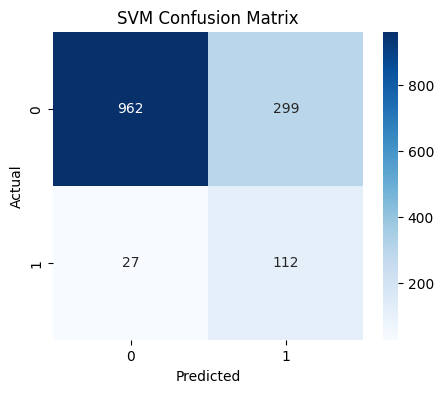

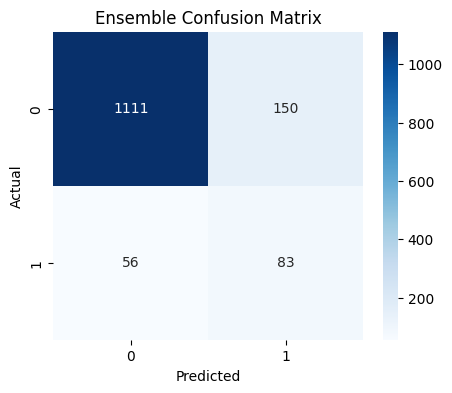

In [ ]:
# Get predictions
svm_preds = svm_model.predict(X_test_scaled)
ensemble_preds = voting_clf.predict(X_test_scaled)

# Plot confusion matrices
plot_conf_matrix(y_test, svm_preds, title="SVM Confusion Matrix")
plot_conf_matrix(y_test, ensemble_preds, title="Ensemble Confusion Matrix")


🔍 Tuning MLPClassifier...
🔍 Tuning SVC...
🔍 Tuning RandomForest...

📊 MLP (Tuned) ROC AUC: 0.8164
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1261
           1       0.32      0.50      0.39       139

    accuracy                           0.85      1400
   macro avg       0.63      0.69      0.65      1400
weighted avg       0.88      0.85      0.86      1400



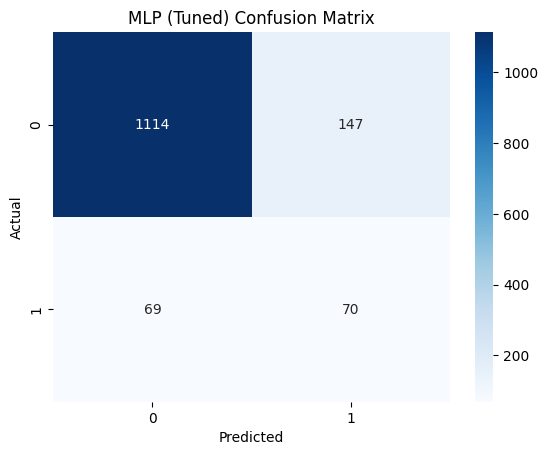


📊 SVM (Tuned) ROC AUC: 0.8196
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      1261
           1       0.25      0.73      0.37       139

    accuracy                           0.76      1400
   macro avg       0.61      0.74      0.61      1400
weighted avg       0.89      0.76      0.80      1400



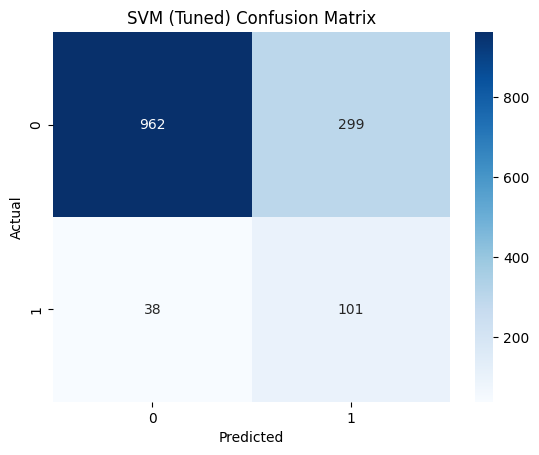


📊 Random Forest (Tuned) ROC AUC: 0.8742
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1261
           1       0.38      0.43      0.40       139

    accuracy                           0.87      1400
   macro avg       0.66      0.68      0.67      1400
weighted avg       0.88      0.87      0.88      1400



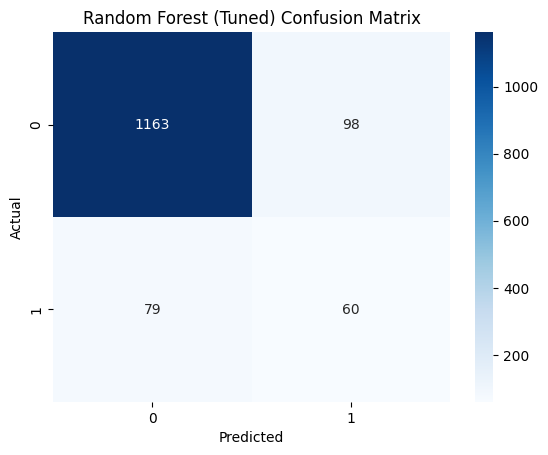


📊 Voting Ensemble (Tuned) ROC AUC: 0.8593
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1261
           1       0.36      0.53      0.43       139

    accuracy                           0.86      1400
   macro avg       0.65      0.71      0.68      1400
weighted avg       0.89      0.86      0.87      1400



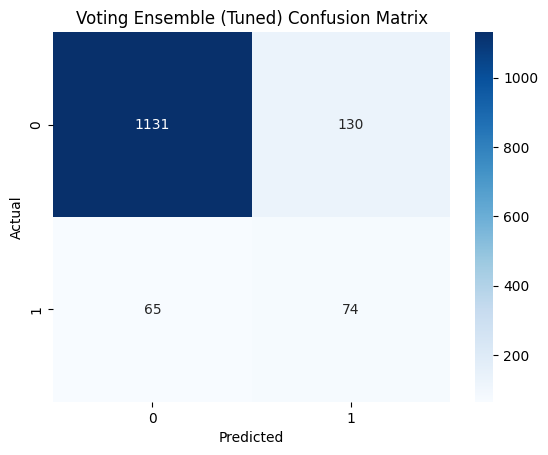

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# 🔍 Define hyperparameter grids
mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (128, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.01],
    'learning_rate_init': [0.001, 0.0005],
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf', 'poly'],
}

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# 🔄 Grid Search
print("🔍 Tuning MLPClassifier...")
mlp_grid = GridSearchCV(MLPClassifier(max_iter=5000, random_state=42), mlp_param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
mlp_grid.fit(X_resampled, y_resampled)

print("🔍 Tuning SVC...")
svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
svm_grid.fit(X_resampled, y_resampled)

print("🔍 Tuning RandomForest...")
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
rf_grid.fit(X_resampled, y_resampled)

# 🧠 Best models
best_mlp = mlp_grid.best_estimator_
best_svm = svm_grid.best_estimator_
best_rf = rf_grid.best_estimator_

# 🧪 Evaluate
def evaluate_model(model, name):
    probs = model.predict_proba(X_test_scaled)[:, 1]
    preds = model.predict(X_test_scaled)
    auc = roc_auc_score(y_test, probs)
    print(f"\n📊 {name} ROC AUC: {auc:.4f}")
    print(classification_report(y_test, preds))
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model(best_mlp, "MLP (Tuned)")
evaluate_model(best_svm, "SVM (Tuned)")
evaluate_model(best_rf, "Random Forest (Tuned)")

# 🔗 Voting Ensemble using best models
voting = VotingClassifier(estimators=[
    ('mlp', best_mlp),
    ('svm', best_svm),
    ('rf', best_rf)
], voting='soft')

voting.fit(X_resampled, y_resampled)
evaluate_model(voting, "Voting Ensemble (Tuned)")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.over_sampling import ADASYN, BorderlineSMOTE
from imblearn.pipeline import Pipeline

# 📁 Load dataset
df_train = pd.read_csv("/content/df_train.csv")

# 🎯 Split features and target
X = df_train.drop(columns=['coppaRisk'])
y = df_train['coppaRisk']

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ⚖️ Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔄 Define sampling strategies (now only ADASYN and Borderline-SMOTE)
samplers = {
    'ADASYN': ADASYN(random_state=42),
    'Borderline-SMOTE': BorderlineSMOTE(random_state=42, kind='borderline-1')  # More conservative
}

# 🏗️ Define 5 models (keeping top performers)
models = {
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),  # Added class_weight
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
}

# 🚀 Train and evaluate
best_auc = 0
best_combo = {}

for sampler_name, sampler in samplers.items():
    print(f"\n🔥 Evaluating {sampler_name}...")

    # Resample data
    X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)

    # Train models
    for model_name, model in models.items():
        model.fit(X_resampled, y_resampled)
        probs = model.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(y_test, probs)
        print(f"{model_name}: AUC = {auc:.4f}")

        if auc > best_auc:
            best_auc = auc
            best_combo = {'sampler': sampler_name, 'model': model_name}

# 🏆 Best single model
print(f"\n🎯 Best single model: {best_combo['model']} with {best_combo['sampler']} (AUC = {best_auc:.4f})")

# 🌟 Build ensembles with best sampler
best_sampler = samplers[best_combo['sampler']]
X_resampled, y_resampled = best_sampler.fit_resample(X_train_scaled, y_train)

# 1. Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(
    estimators=list(models.items()),
    voting='soft'
)
voting_clf.fit(X_resampled, y_resampled)

# 2. Stacking Classifier (Meta-model: Logistic Regression)
stack_clf = StackingClassifier(
    estimators=list(models.items()),
    final_estimator=XGBClassifier()  # Meta-model upgraded to XGBoost
)
stack_clf.fit(X_resampled, y_resampled)

# 📊 Evaluate
for name, clf in [('Voting', voting_clf), ('Stacking', stack_clf)]:
    probs = clf.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, probs)
    print(f"\n{name} Ensemble AUC: {auc:.4f}")
    print(classification_report(y_test, clf.predict(X_test_scaled)))

# 📈 Feature Importance (LightGBM)
lgbm = models['LightGBM']
lgbm.fit(X_resampled, y_resampled)
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lgbm.feature_importances_
}).sort_values('Importance', ascending=False)
print("\n🔍 Top 10 Features by LightGBM Importance:")
print(importances.head(10))


🔥 Evaluating ADASYN...
XGBoost: AUC = 0.8689
[LightGBM] [Info] Number of positive: 5120, number of negative: 5043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2283
[LightGBM] [Info] Number of data points in the train set: 10163, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503788 -> initscore=0.015153
[LightGBM] [Info] Start training from score 0.015153


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM: AUC = 0.8841
Random Forest: AUC = 0.8702
SVM: AUC = 0.8235
Logistic Regression: AUC = 0.8024

🔥 Evaluating Borderline-SMOTE...
XGBoost: AUC = 0.8709
[LightGBM] [Info] Number of positive: 5043, number of negative: 5043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2136
[LightGBM] [Info] Number of data points in the train set: 10086, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM: AUC = 0.8730
Random Forest: AUC = 0.8771
SVM: AUC = 0.8233
Logistic Regression: AUC = 0.7970

🎯 Best single model: LightGBM with ADASYN (AUC = 0.8841)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5120, number of negative: 5043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2283
[LightGBM] [Info] Number of data points in the train set: 10163, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503788 -> initscore=0.015153
[LightGBM] [Info] Start training from score 0.015153


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5120, number of negative: 5043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2283
[LightGBM] [Info] Number of data points in the train set: 10163, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503788 -> initscore=0.015153
[LightGBM] [Info] Start training from score 0.015153


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4096, number of negative: 4034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2280
[LightGBM] [Info] Number of data points in the train set: 8130, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503813 -> initscore=0.015252
[LightGBM] [Info] Start training from score 0.015252


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4096, number of negative: 4034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2092
[LightGBM] [Info] Number of data points in the train set: 8130, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503813 -> initscore=0.015252
[LightGBM] [Info] Start training from score 0.015252


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4096, number of negative: 4034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2275
[LightGBM] [Info] Number of data points in the train set: 8130, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503813 -> initscore=0.015252
[LightGBM] [Info] Start training from score 0.015252


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4096, number of negative: 4035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2118
[LightGBM] [Info] Number of data points in the train set: 8131, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503751 -> initscore=0.015005
[LightGBM] [Info] Start training from score 0.015005


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4096, number of negative: 4035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2099
[LightGBM] [Info] Number of data points in the train set: 8131, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503751 -> initscore=0.015005
[LightGBM] [Info] Start training from score 0.015005


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Voting Ensemble AUC: 0.8758


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1261
           1       0.36      0.65      0.46       139

    accuracy                           0.85      1400
   macro avg       0.66      0.76      0.69      1400
weighted avg       0.90      0.85      0.87      1400



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Stacking Ensemble AUC: 0.8394


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1261
           1       0.36      0.27      0.31       139

    accuracy                           0.88      1400
   macro avg       0.64      0.61      0.62      1400
weighted avg       0.87      0.88      0.87      1400

[LightGBM] [Info] Number of positive: 5120, number of negative: 5043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2283
[LightGBM] [Info] Number of data points in the train set: 10163, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503788 -> initscore=0.015153
[LightGBM] [Info] Start training from score 0.015153


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



🔍 Top 10 Features by LightGBM Importance:
                                    Feature  Importance
5                     primaryGenreName_freq         515
6                         downloads_encoded         501
1                                    appAge         383
0                           userRatingCount         346
3                     developerCountry_freq         330
2                         averageUserRating         224
4                          countryCode_freq         162
7   appDescriptionBrandSafetyRating_encoded         148
9             isCorporateEmailScore_encoded         145
11      hasTermsOfServiceLinkRating_encoded         130


In [ ]:
from google.colab import files
files.download('/content/test_real.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Result 1

In [ ]:
# 📦 Install first if not already
# pip install imbalanced-learn scikit-learn pandas

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE

# 📁 Load dataset
df_train = pd.read_csv("/content/df_train.csv")

# 🎯 Split features and target
X = df_train.drop(columns=['coppaRisk'])
y = df_train['coppaRisk']

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ⚖️ Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔄 Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# 🧠 Define models
svm_model = SVC(probability=True, random_state=42)
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
mlp = MLPClassifier(max_iter=500, random_state=42)

# 🎯 Train models
svm_model.fit(X_resampled, y_resampled)
logreg.fit(X_resampled, y_resampled)
rf.fit(X_resampled, y_resampled)
mlp.fit(X_resampled, y_resampled)

# 🔗 Ensemble with VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('lr', logreg),
    ('rf', rf),
    ('mlp', mlp)
], voting='soft')

voting_clf.fit(X_resampled, y_resampled)

# 📊 Evaluate
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]
ensemble_probs = voting_clf.predict_proba(X_test_scaled)[:, 1]

svm_auc = roc_auc_score(y_test, svm_probs)
ensemble_auc = roc_auc_score(y_test, ensemble_probs)

print(f"SVM ROC AUC: {svm_auc:.4f}")
print(f"Ensemble ROC AUC: {ensemble_auc:.4f}")

# Optional: print classification report for ensemble
ensemble_preds = voting_clf.predict(X_test_scaled)
print("\nEnsemble Classification Report:\n")
print(classification_report(y_test, ensemble_preds))


SVM ROC AUC: 0.8230
Ensemble ROC AUC: 0.8658

Ensemble Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      1261
           1       0.36      0.60      0.45       139

    accuracy                           0.85      1400
   macro avg       0.65      0.74      0.68      1400
weighted avg       0.89      0.85      0.87      1400



In [ ]:
new_df = test_copy.copy()
new_df.drop(columns=['ID'], inplace=True)
# Apply the same scaling transformation
new_df_scaled = scaler.transform(new_df)


In [ ]:
new_df.isna().sum()

,0
userRatingCount,0
appAge,0
averageUserRating,0
developerCountry_freq,0
countryCode_freq,0
primaryGenreName_freq,0
downloads_encoded,0
appDescriptionBrandSafetyRating_encoded,0
mfaRating_encoded,0
isCorporateEmailScore_encoded,0


In [ ]:
new_df.head()

,userRatingCount,appAge,averageUserRating,developerCountry_freq,countryCode_freq,primaryGenreName_freq,downloads_encoded,appDescriptionBrandSafetyRating_encoded,mfaRating_encoded,isCorporateEmailScore_encoded,hasPrivacyLink_encoded,hasTermsOfServiceLinkRating_encoded,deviceType_GLOBAL,deviceType_connected-tv/ott,deviceType_smartphone,deviceType_tablet,deviceType_undetermined
0,2,81.600000,5.0,4338.0,5802.0,71.0,1,0,0,-1,1,-1,1.0,0.0,0.0,0.0,0.0
1,0,24.700000,0.0,13.0,73.0,1828.0,8,0,0,0,1,0,1.0,0.0,0.0,0.0,0.0
2,13059,40.300000,4.0,324.0,41.0,1828.0,9,0,0,1,1,1,0.0,0.0,1.0,0.0,0.0
3,0,39.233333,0.0,4338.0,5802.0,1828.0,-1,1,0,-1,1,1,1.0,0.0,0.0,0.0,0.0
4,0,65.533333,0.0,4338.0,5802.0,268.0,-1,0,0,-1,-1,-1,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Predict using the ensemble model
new_probs = voting_clf.predict_proba(new_df_scaled)[:, 1]

# Convert probabilities to class predictions
new_preds = voting_clf.predict(new_df_scaled)


In [ ]:
# Show the predicted probabilities and classes
new_df['coppaRisk_probability'] = new_probs
new_df['coppaRisk_prediction'] = new_preds

# Display the first few rows
# print(new_df[['coppaRisk_probability', 'coppaRisk_prediction']].head())


# OTW 2

In [ ]:
# 📦 Install terlebih dahulu jika belum
# pip install imbalanced-learn scikit-learn pandas

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 📁 Load dataset
df_train = pd.read_csv("/content/df_train.csv")

# 🎯 Split features and target
X = df_train.drop(columns=['coppaRisk'])
y = df_train['coppaRisk']

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ⚖️ Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔄 Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# 🧠 Base models
svm_model = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
mlp_model = MLPClassifier(max_iter=500, random_state=42)

# 🧠 Meta-model
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# 🔗 Stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('svm', svm_model),
        ('rf', rf_model),
        ('mlp', mlp_model)
    ],
    final_estimator=meta_model,
    passthrough=True,       # Optional: pass original features to final estimator
    cv=5,
    n_jobs=-1
)

# 🏋️ Train the stacking model
stacking_clf.fit(X_resampled, y_resampled)

# 📊 Evaluate
y_pred_stack = stacking_clf.predict(X_test_scaled)
y_proba_stack = stacking_clf.predict_proba(X_test_scaled)[:, 1]

print(f"\n📊 Stacking ROC AUC: {roc_auc_score(y_test, y_proba_stack):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack))



📊 Stacking ROC AUC: 0.8518

Confusion Matrix:
 [[1192   69]
 [  94   45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1261
           1       0.39      0.32      0.36       139

    accuracy                           0.88      1400
   macro avg       0.66      0.63      0.65      1400
weighted avg       0.87      0.88      0.88      1400



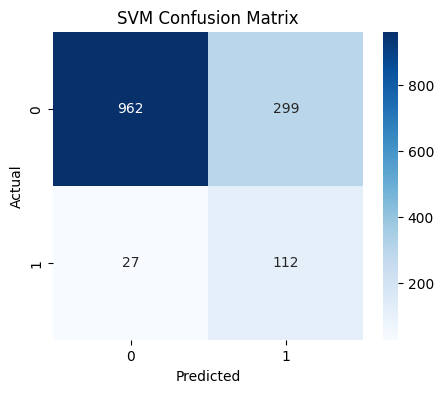

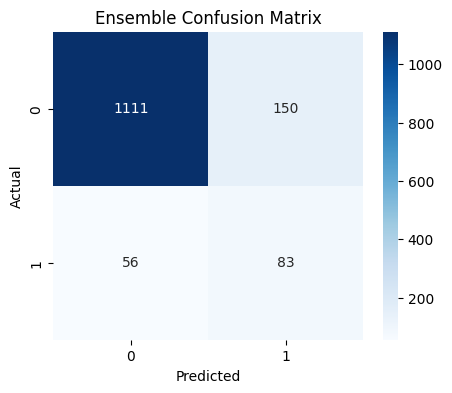

In [ ]:
# Get predictions
svm_preds = svm_model.predict(X_test_scaled)
ensemble_preds = stacking_clf.predict(X_test_scaled)

# Plot confusion matrices
plot_conf_matrix(y_test, svm_preds, title="SVM Confusion Matrix")
plot_conf_matrix(y_test, ensemble_preds, title="Ensemble Confusion Matrix")


In [ ]:
new_df = pd.read_csv("/content/test_real.csv")
new_df.drop(columns=['ID'], inplace=True)
# Apply the same scaling transformation
new_df_scaled = scaler.transform(new_df)


In [ ]:
new_df.isna().sum()

,0
userRatingCount,0
appAge,0
averageUserRating,0
developerCountry_freq,0
countryCode_freq,0
primaryGenreName_freq,0
downloads_encoded,0
appDescriptionBrandSafetyRating_encoded,0
mfaRating_encoded,0
isCorporateEmailScore_encoded,0


In [ ]:
new_df.head()

,userRatingCount,appAge,averageUserRating,developerCountry_freq,countryCode_freq,primaryGenreName_freq,downloads_encoded,appDescriptionBrandSafetyRating_encoded,mfaRating_encoded,isCorporateEmailScore_encoded,hasPrivacyLink_encoded,hasTermsOfServiceLinkRating_encoded,deviceType_GLOBAL,deviceType_connected-tv/ott,deviceType_smartphone,deviceType_tablet,deviceType_undetermined
0,2,81.600000,5.0,4338.0,5802.0,71.0,1,0,0,-1,1,-1,1.0,0.0,0.0,0.0,0.0
1,0,24.700000,0.0,13.0,73.0,1828.0,8,0,0,0,1,0,1.0,0.0,0.0,0.0,0.0
2,13059,40.300000,4.0,324.0,41.0,1828.0,9,0,0,1,1,1,0.0,0.0,1.0,0.0,0.0
3,0,39.233333,0.0,4338.0,5802.0,1828.0,-1,1,0,-1,1,1,1.0,0.0,0.0,0.0,0.0
4,0,65.533333,0.0,4338.0,5802.0,268.0,-1,0,0,-1,-1,-1,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Predict using the ensemble model
new_probs = boosting_voting.predict_proba(new_df_scaled)[:, 1]

# Convert probabilities to class predictions
new_preds = boosting_voting.predict(new_df_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Show the predicted probabilities and classes
new_df['coppaRisk_probability'] = new_probs
new_df['coppaRisk_prediction'] = new_preds

# Display the first few rows
# print(new_df[['coppaRisk_probability', 'coppaRisk_prediction']].head())


In [ ]:
new_df['coppaRisk_prediction'].value_counts()

,count
coppaRisk_prediction,
0,2487
1,513


# 3 (pilihan terakhir submit hari ini)

In [ ]:
# 📦 Install dulu jika perlu
# pip install xgboost lightgbm imbalanced-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 📁 Load dataset
df_train = pd.read_csv("/content/df_train.csv")

# 🎯 Pisahkan fitur dan target
X = df_train.drop(columns=['coppaRisk'])
y = df_train['coppaRisk']

# 🔀 Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ⚖️ Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔄 Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# ⚙️ Define Boosting Models
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgb = LGBMClassifier(random_state=42)

# 🧠 Voting Ensemble dari Boosting Models
boosting_voting = VotingClassifier(estimators=[
    ('ada', ada),
    ('gb', gb),
    ('xgb', xgb),
    ('lgb', lgb)
], voting='soft')  # soft untuk pakai probabilitas

# 🏋️‍♂️ Training
boosting_voting.fit(X_resampled, y_resampled)

# 📊 Evaluasi
y_proba_boost_vote = boosting_voting.predict_proba(X_test_scaled)[:, 1]
y_pred_boost_vote = boosting_voting.predict(X_test_scaled)

print("📊 Voting Ensemble dari Boosting Models ROC AUC:", roc_auc_score(y_test, y_proba_boost_vote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_boost_vote))
print("Classification Report:\n", classification_report(y_test, y_pred_boost_vote))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5043, number of negative: 5043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2288
[LightGBM] [Info] Number of data points in the train set: 10086, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
📊 Voting Ensemble dari Boosting Models ROC AUC: 0.8791612229645308
Confusion Matrix:
 [[1146  115]
 [  64   75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1261
           1       0.39      0.54      0.46       139

    accuracy                           0.87      1400
   macro avg       0.67      0.72      0.69      1400
weighted avg       0.89      0.87      0.88      1400



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# 📦 Install dulu jika perlu
# pip install xgboost lightgbm imbalanced-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 📁 Load dataset
df_train = pd.read_csv("/content/df_train.csv")

# 🎯 Pisahkan fitur dan target
X = df_train.drop(columns=['coppaRisk'])
y = df_train['coppaRisk']

# 🔀 Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ⚖️ Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔄 Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# ⚙️ Define Boosting Models
# ada = AdaBoostClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
# svm = SVC(probability=True, random_state=42)
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
mlp = MLPClassifier(max_iter=500, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgb = LGBMClassifier(random_state=42)

# 🧠 Voting Ensemble dari Boosting Models
boosting_voting = VotingClassifier(estimators=[
    # ('ada', ada),
    ('gb', gb),
    ('logreg', logreg),
    ('rf', rf),
    ('mlp', mlp),
    #  ('xgb', xgb),
    ('lgb', lgb)
], voting='soft')  # soft untuk pakai probabilitas

# 🏋️‍♂️ Training
boosting_voting.fit(X_resampled, y_resampled)

# 📊 Evaluasi
y_proba_boost_vote = boosting_voting.predict_proba(X_test_scaled)[:, 1]
y_pred_boost_vote = boosting_voting.predict(X_test_scaled)

print("📊 Voting Ensemble dari Boosting Models ROC AUC:", roc_auc_score(y_test, y_proba_boost_vote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_boost_vote))
print("Classification Report:\n", classification_report(y_test, y_pred_boost_vote))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5043, number of negative: 5043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2288
[LightGBM] [Info] Number of data points in the train set: 10086, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
📊 Voting Ensemble dari Boosting Models ROC AUC: 0.8767336646146999
Confusion Matrix:
 [[1111  150]
 [  56   83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      1261
           1       0.36      0.60      0.45       139

    accuracy                           0.85      1400
   macro avg       0.65      0.74      0.68      1400
weighted avg       0.89      0.85      0.87      1400



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# 4 ensemble stacking boosting lr

In [ ]:
# 📦 Install jika perlu
# pip install xgboost imbalanced-learn scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# 📁 Load dataset
df_train = pd.read_csv("/content/df_train.csv")

# 🎯 Split features and target
X = df_train.drop(columns=['coppaRisk'])
y = df_train['coppaRisk']

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ⚖️ Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔄 Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# 🤖 Define base learners
# svm = SVC(probability=True, random_state=42)
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
mlp = MLPClassifier(max_iter=500, random_state=42)
# svm = SVC(probability=True, kernel='rbf', C=1.0, gamma='scale', random_state=42)
# rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

# 🧠 Meta-model (final estimator)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# 🔗 Stacking Classifier with Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
stacking_model = StackingClassifier(
    estimators=[
        # ('svm', svm),
        ('logreg', logreg),
        ('rf', rf),
        ('xgb', xgb),
        ('mlp', mlp)
    ],
    final_estimator=meta_model,
    cv=cv,
    n_jobs=-1
)

# 🏋️‍♂️ Train stacking model
stacking_model.fit(X_resampled, y_resampled)

# 📊 Evaluate model
y_pred_stack = stacking_model.predict(X_test_scaled)
y_proba_stack = stacking_model.predict_proba(X_test_scaled)[:, 1]

print("📊 Stacking ROC AUC:", roc_auc_score(y_test, y_proba_stack))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack))


📊 Stacking ROC AUC: 0.8772585420957445

Confusion Matrix:
 [[1188   73]
 [  85   54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1261
           1       0.43      0.39      0.41       139

    accuracy                           0.89      1400
   macro avg       0.68      0.67      0.67      1400
weighted avg       0.88      0.89      0.88      1400

